In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

In [ ]:
url = 'https://www.flipkart.com/search?q=laptop&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_2_0_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptop&requestId=423e483c-54d0-4e20-b2b9-20c6c8eb0a4b&page=1'

In [ ]:
page = requests.get(url)

In [ ]:
page.status_code

200

In [ ]:
pagecontent = page.text

In [ ]:
soup = BeautifulSoup(pagecontent)

In [ ]:
for x in soup.find_all('div', attrs={'class' : "_4rR01T"}):
    print(x.text)

Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap...
Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/N...
ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and Light La...
HP 15s (2023) Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s-ey1509AU Thin and Light L...
HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop
ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS | X515EA-EJ328WS ...
APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A
Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce R...
HP 15s (2023) Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home) 15s-fr4001TU Thin and Light ...
Lenovo Intel Celeron Dual Core - (8 GB/256 GB SSD/Windows 11 Home) 15IGL05 Laptop
Lenovo 

In [ ]:
for x in soup.find_all('div', attrs={'class' : "_1_WHN1"}):
    print(x.text)

₹40,490
₹48,990
₹42,990
₹31,990
₹49,990
₹34,990
₹81,990
₹87,990
₹52,990
₹30,890
₹99,990
₹44,990
₹35,990
₹26,990
₹39,990
₹40,999
₹39,990
₹41,900
₹36,999
₹34,990
₹44,990
₹65,990
₹35,990
₹35,990


In [ ]:
for x in soup.find_all('div' , attrs={'class':'_3LWZlK'}):
    print(x.text)

4.3
4.3
4.3
4
4.3
4.2
4.7
4.3
4.1
4.2
4.2
4.1
4.3
4.3
4.4
4
4.4
4.3
4.4
4.3
4.3
4.3
4.2
5
4
4.3
4
4
4.3
3
2
4.1
5
4
4.3
4
5


# productname, price ,specifications ,ratings ,pagenum

In [ ]:
productname=[]
price=[]
specifications=[]
rating=[]
pagenum=[]



for i in range(1,50):
    start_time = time.time()
    url = 'https://www.flipkart.com/search?q=laptop&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_2_0_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptop&requestId=423e483c-54d0-4e20-b2b9-20c6c8eb0a4b&page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class': '_2kHMtA'}):
        pname = x.find('div', attrs={'class' : "_4rR01T"})
        cost = x.find('div', attrs={'class' : "_1_WHN1"})
        features = x.find('ul' , attrs={'class':'_1xgFaf'})
        ratng = x.find('div' , attrs={'class':'_3LWZlK'})


        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)

        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)

        if features is None:
            specifications.append(np.NaN)
        else:
            specifications.append(features.text)

        if ratng is None:
            rating.append(np.NaN)
        else:
            rating.append(ratng.text)

        pagenum.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time() -  start_time))

Page 1 completed in 2.035792112350464 seconds
Page 2 completed in 1.9441847801208496 seconds
Page 3 completed in 1.9037652015686035 seconds
Page 4 completed in 2.0859220027923584 seconds
Page 5 completed in 1.9860782623291016 seconds
Page 6 completed in 2.0446786880493164 seconds
Page 7 completed in 2.5630850791931152 seconds
Page 8 completed in 2.0416295528411865 seconds
Page 9 completed in 1.871464490890503 seconds
Page 10 completed in 1.953050136566162 seconds
Page 11 completed in 1.9162490367889404 seconds
Page 12 completed in 2.1533236503601074 seconds
Page 13 completed in 2.0168416500091553 seconds
Page 14 completed in 1.8550262451171875 seconds
Page 15 completed in 1.8149147033691406 seconds
Page 16 completed in 1.888840913772583 seconds
Page 17 completed in 2.030937433242798 seconds
Page 18 completed in 2.100855827331543 seconds
Page 19 completed in 2.01656174659729 seconds
Page 20 completed in 1.8977375030517578 seconds
Page 21 completed in 1.8573944568634033 seconds
Page 22 c

In [ ]:
len(productname)

984

In [ ]:
laptops = pd.DataFrame({'productname':productname , 'price': price , 'specifications': specifications , 'rating':rating , 'pagenumber': pagenum})

In [ ]:
laptops.head()

,productname,price,specifications,rating,pagenumber
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,"₹48,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1
1,GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 G...,"₹79,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.4,1
2,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,"₹42,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1
3,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,"₹31,990",AMD Athlon Dual Core Processor8 GB DDR4 RAMWin...,4,1
4,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.2,1


In [ ]:
laptops['productname'].unique()

array(['Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA...',
       'GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce RTX 3...',
       'ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and Light La...',
       'HP 15s (2023) Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s-ey1509AU Thin and Light L...',
       'ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS | X515EA-EJ328WS ...',
       'HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop',
       'HP 15s (2023) Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home) 15s-fr4001TU Thin and Light ...',
       'Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 81X800J3IN|81X800LGIN...',
       'Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) V

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,"₹41,900",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,"₹65,990",AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,"₹45,964",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,NaN,41
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,"₹58,390",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41


In [ ]:
laptops['productname'] = laptops['productname'].apply(lambda x: ''.join(x))

In [ ]:
laptops['price'] = laptops['price'].apply(lambda x: ''.join(x))

In [ ]:
laptops.to_csv('mobile_df.csv')

In [ ]:
laptops['productname'][5]

'HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop'

In [ ]:
laptops['specifications'][0]

'Intel Core i5 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD100.63 cm (39.62 cm) Display1Year Onsite warranty'

In [ ]:
# extract brand
regex = r'^\w+'
laptops['brand']= laptops['productname'].apply(lambda x: re.compile(regex).findall(x))

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,[APPLE]
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,"₹41,900",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,[Lenovo]
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,"₹65,990",AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,[HP]
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,"₹45,964",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,NaN,41,[Lenovo]
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,"₹58,390",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,[DELL]


In [ ]:
# extract RAM
regex = r'[0-9]*[0-9]\sGB\s[A-Z]*[A-Z]*DDR[0-9]'
laptops['RAM']= laptops['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,[APPLE],[]
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,"₹41,900",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,[Lenovo],[8 GB DDR4]
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,"₹65,990",AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,[HP],[16 GB DDR4]
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,"₹45,964",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,NaN,41,[Lenovo],[8 GB DDR4]
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,"₹58,390",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,[DELL],[8 GB DDR4]


In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productname     984 non-null    object
 1   price           984 non-null    object
 2   specifications  984 non-null    object
 3   rating          723 non-null    object
 4   pagenumber      984 non-null    int64 
 5   brand           984 non-null    object
 6   RAM             984 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.9+ KB


In [ ]:
laptops.isnull().sum()

productname         0
price               0
specifications      0
rating            261
pagenumber          0
brand               0
RAM                 0
dtype: int64

In [ ]:
laptops['brand'] = laptops['brand'].apply(lambda x: ''.join(x))
laptops['RAM'] = laptops['RAM'].apply(lambda x: ''.join(x))
laptops['price'] = laptops['price'].apply(lambda x: x.replace('₹','').replace(",",'')).astype(float)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,NaN,41,Lenovo,8 GB DDR4
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,58390.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,DELL,8 GB DDR4


In [ ]:
laptops.isnull().sum()

productname         0
price               0
specifications      0
rating            261
pagenumber          0
brand               0
RAM                 0
dtype: int64

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          723 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          723 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops = laptops.fillna(0)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0,41,Lenovo,8 GB DDR4
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,58390.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,DELL,8 GB DDR4


In [ ]:
laptops = laptops.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,NaN
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0,41,Lenovo,8 GB DDR4
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,58390.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,DELL,8 GB DDR4


In [ ]:
laptops = laptops.fillna(0)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,0
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0,41,Lenovo,8 GB DDR4
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,58390.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,DELL,8 GB DDR4


In [ ]:
laptops.isnull().sum()

productname       0
price             0
specifications    0
rating            0
pagenumber        0
brand             0
RAM               0
dtype: int64

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops['rating'] = laptops['rating'].astype(float)

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    float64
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 53.9+ KB


In [ ]:
# measure of central tendency
laptops.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,72623.875000,3.129065,21.000000
std,50263.315168,1.898516,11.838176
min,14990.000000,0.000000,1.000000
25%,40490.000000,0.000000,11.000000
50%,54990.000000,4.200000,21.000000
75%,87990.000000,4.300000,31.000000
max,548990.000000,5.000000,41.000000


In [ ]:
laptops

,productname,price,specifications,rating,pagenumber,brand,RAM
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,48990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,Lenovo,8 GB DDR4
1,GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 G...,79990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.4,1,GIGABYTE,16 GB DDR4
2,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
3,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,31990.0,AMD Athlon Dual Core Processor8 GB DDR4 RAMWin...,4.0,1,HP,8 GB DDR4
4,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,34990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.2,1,ASUS,8 GB DDR4
...,...,...,...,...,...,...,...
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,0
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0.0,41,Lenovo,8 GB DDR4


# removing outliers

In [ ]:
laptops.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,72623.875000,3.129065,21.000000
std,50263.315168,1.898516,11.838176
min,14990.000000,0.000000,1.000000
25%,40490.000000,0.000000,11.000000
50%,54990.000000,4.200000,21.000000
75%,87990.000000,4.300000,31.000000
max,548990.000000,5.000000,41.000000


In [ ]:
min_thresold = laptops.price.quantile(0.20)
min_thresold

39990.0

In [ ]:
laptops = laptops[(laptops.price>min_thresold)]

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,0
980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0.0,41,Lenovo,8 GB DDR4
983,DELL Inspiron Core i5 12th Gen - (8 GB/512 GB ...,58390.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...,4.3,41,DELL,8 GB DDR4


In [ ]:
laptops.reset_index(inplace=True)

In [ ]:
laptops

,index,productname,price,specifications,rating,pagenumber,brand,RAM
0,0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,48990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,Lenovo,8 GB DDR4
1,1,GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 G...,79990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.4,1,GIGABYTE,16 GB DDR4
2,2,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
3,5,HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/W...,49990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,HP,8 GB DDR4
4,6,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,52990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.3,1,HP,16 GB DDR4
...,...,...,...,...,...,...,...,...
770,979,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,137990.0,Apple M2 Processor8 GB Unified Memory RAMMac O...,4.3,41,APPLE,0
771,980,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,41900.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
772,981,HP Victus Ryzen 5 Hexa Core 5600H - (16 GB/512...,65990.0,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,4.3,41,HP,16 GB DDR4
773,982,Lenovo IdeaPad 3 Intel Core i3 12th Gen - (8 G...,45964.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,0.0,41,Lenovo,8 GB DDR4


# EDA

# univariate analysis

<Axes: xlabel='brand'>

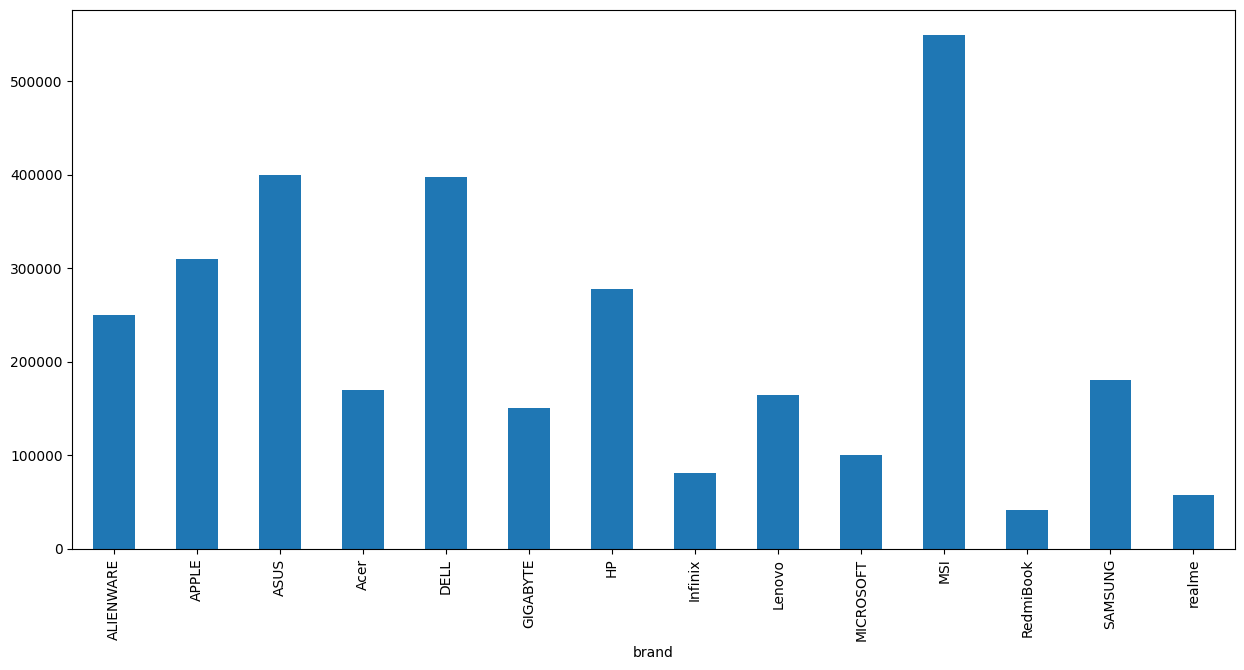

In [ ]:
plt.figure(figsize=(15, 7))
laptops.groupby(['brand'])['price'].max().plot(kind = 'bar')

<Axes: >

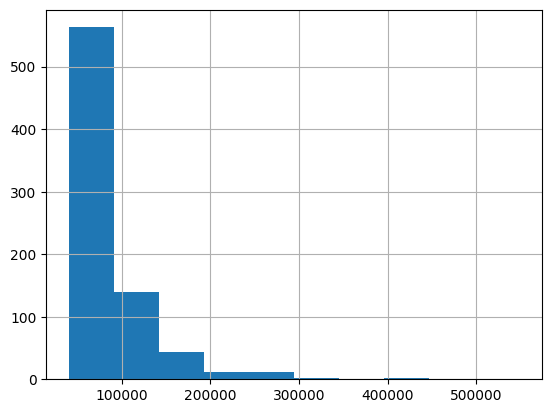

In [ ]:
laptops['price'].hist()

<Axes: xlabel='brand', ylabel='count'>

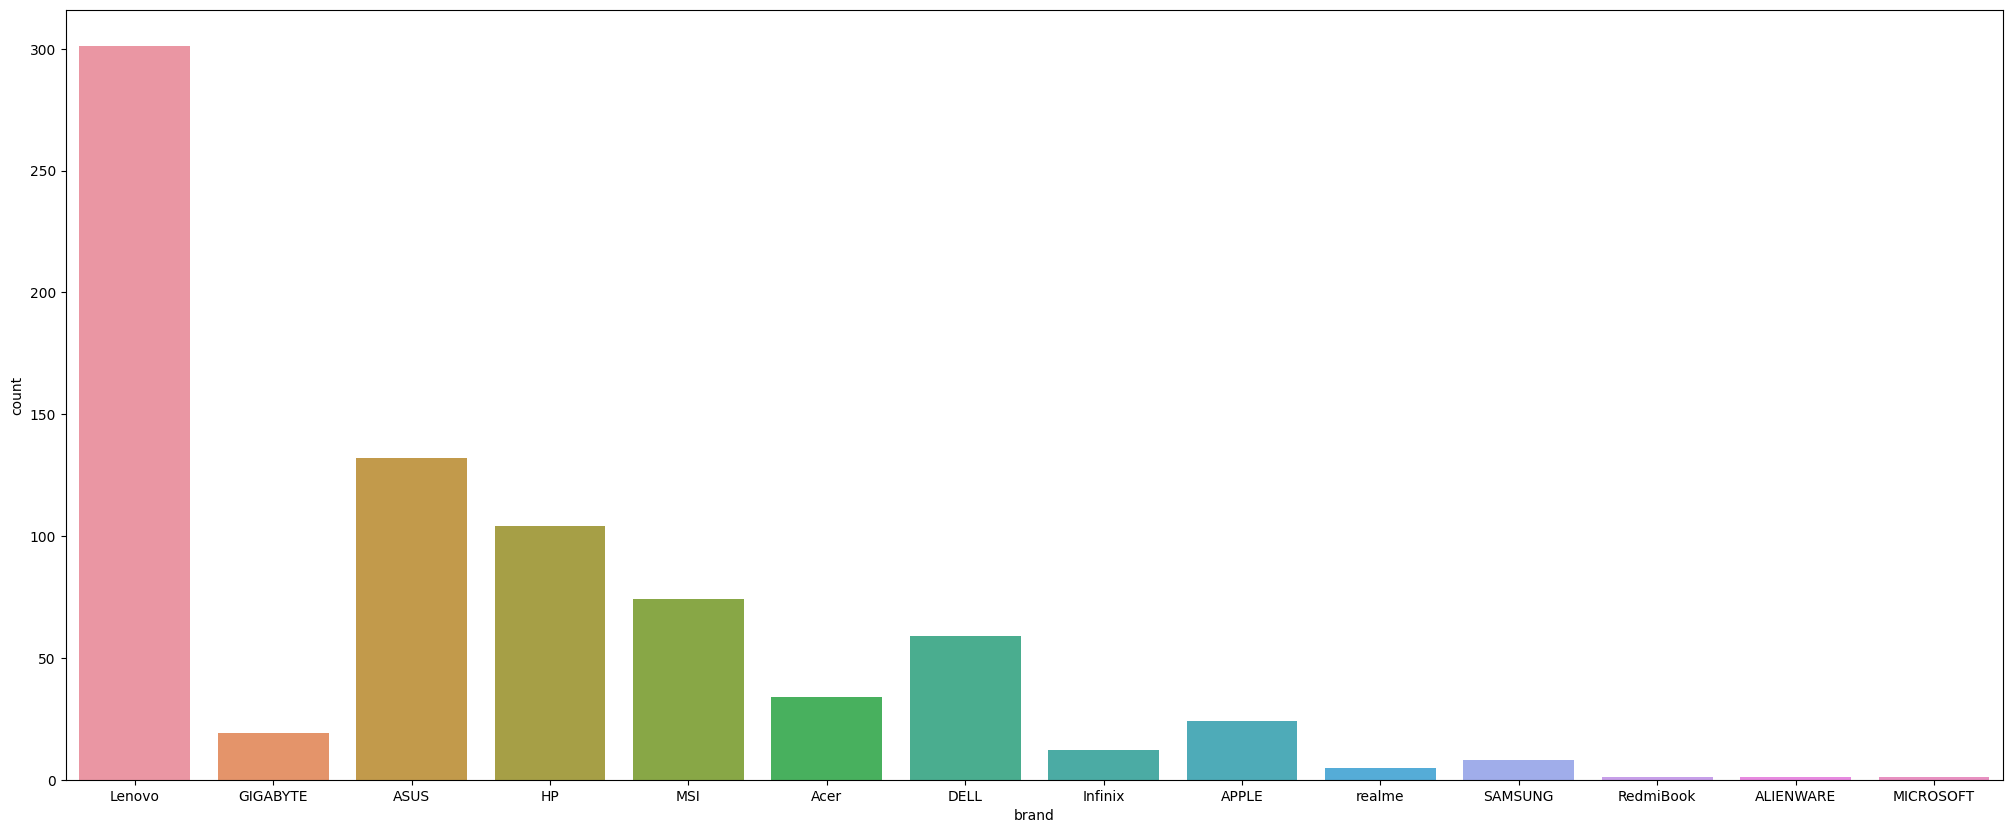

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data = laptops, x = 'brand')

<Axes: xlabel='rating', ylabel='count'>

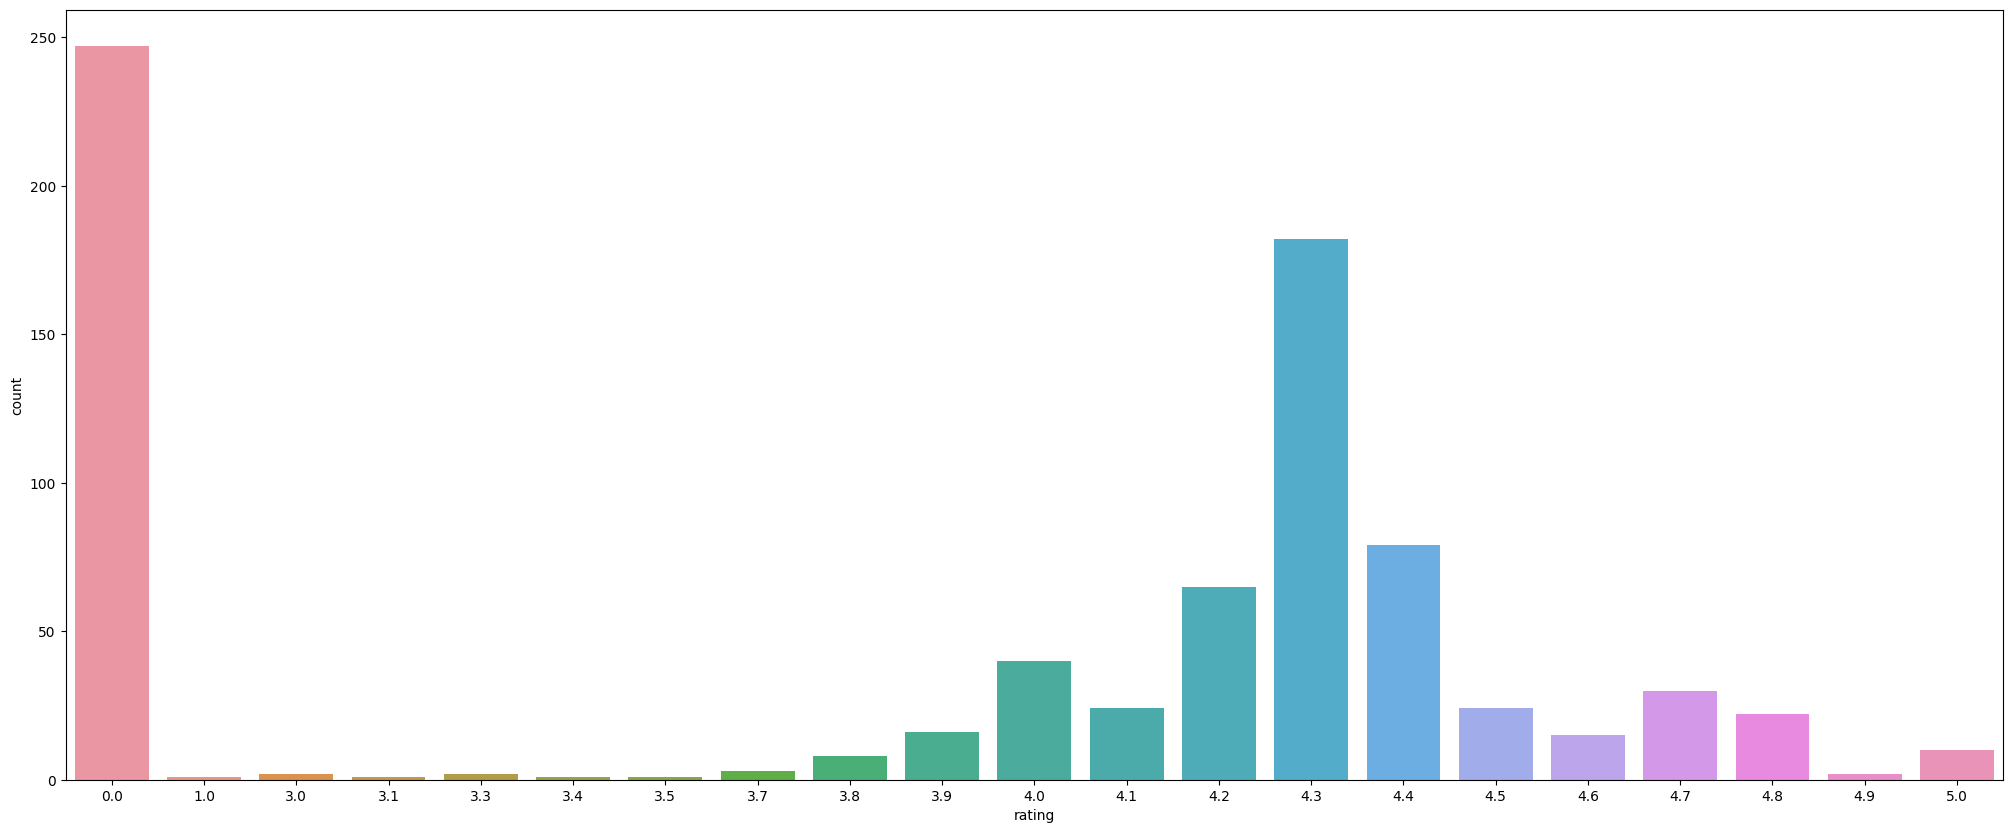

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data = laptops, x = 'rating')

<Axes: ylabel='price'>

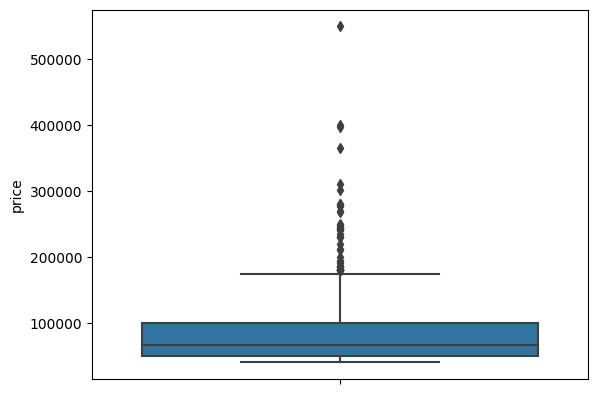

In [68]:
sns.boxplot(y=laptops['price'])

<Axes: ylabel='rating'>

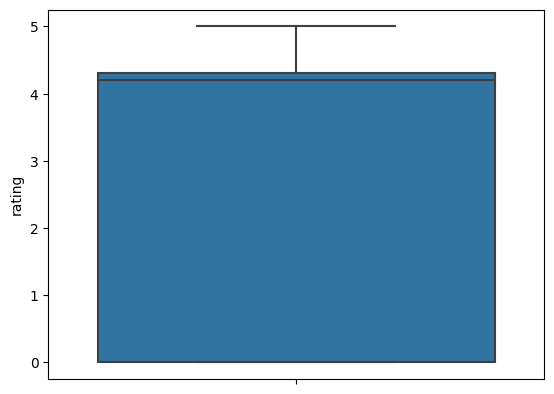

In [69]:
sns.boxplot(y=laptops['rating'])

# multivariate

<Axes: xlabel='brand', ylabel='price'>

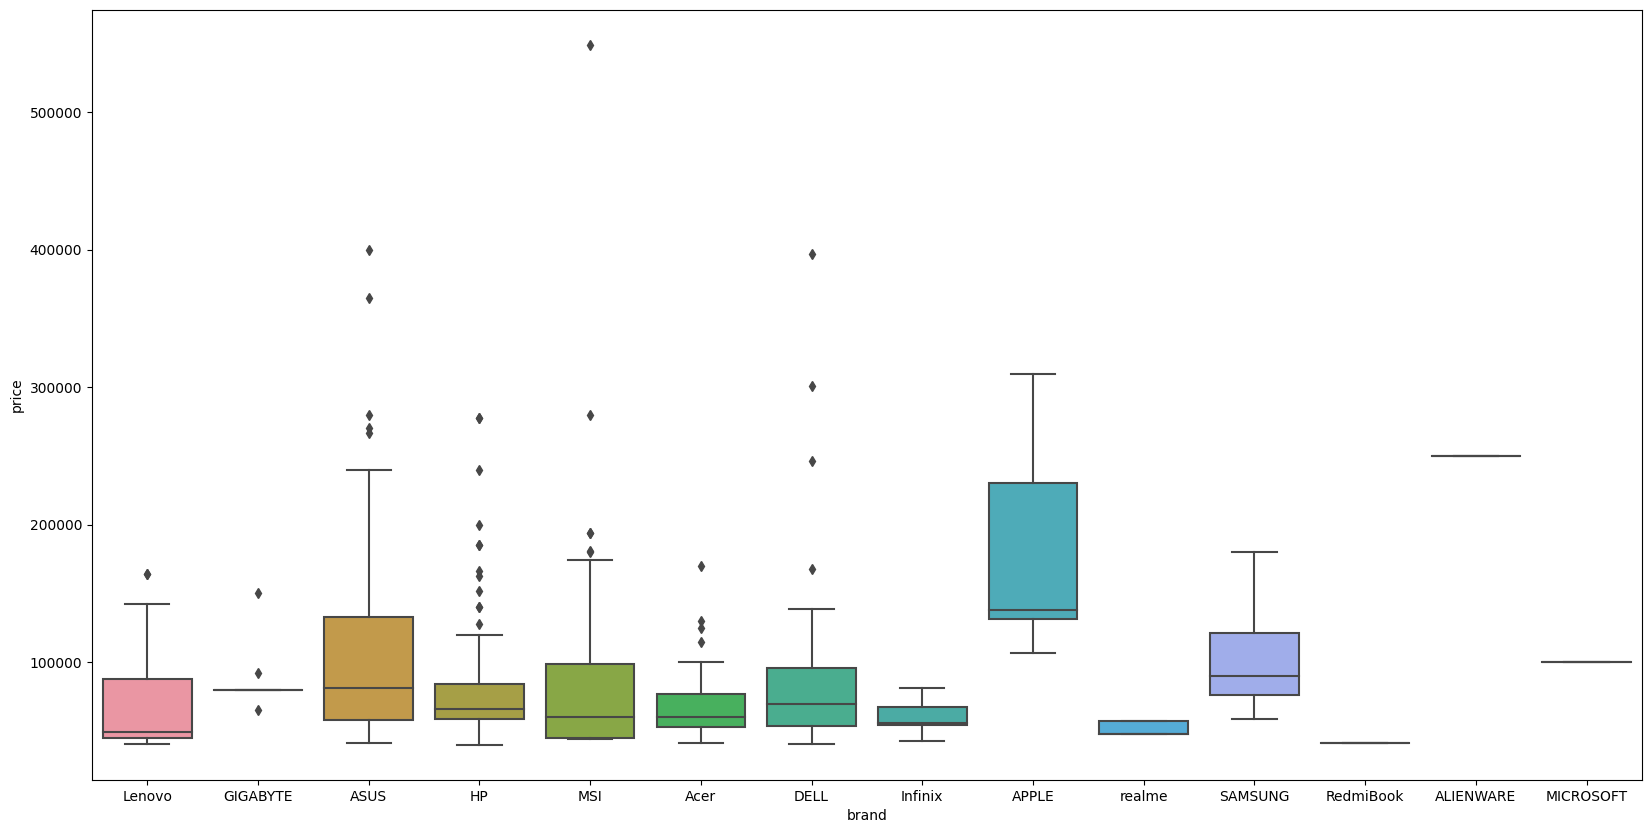

In [70]:
plt.figure(figsize=(20,10))
sns.boxplot(x = laptops.brand, y = laptops.price)

<Axes: xlabel='brand', ylabel='rating'>

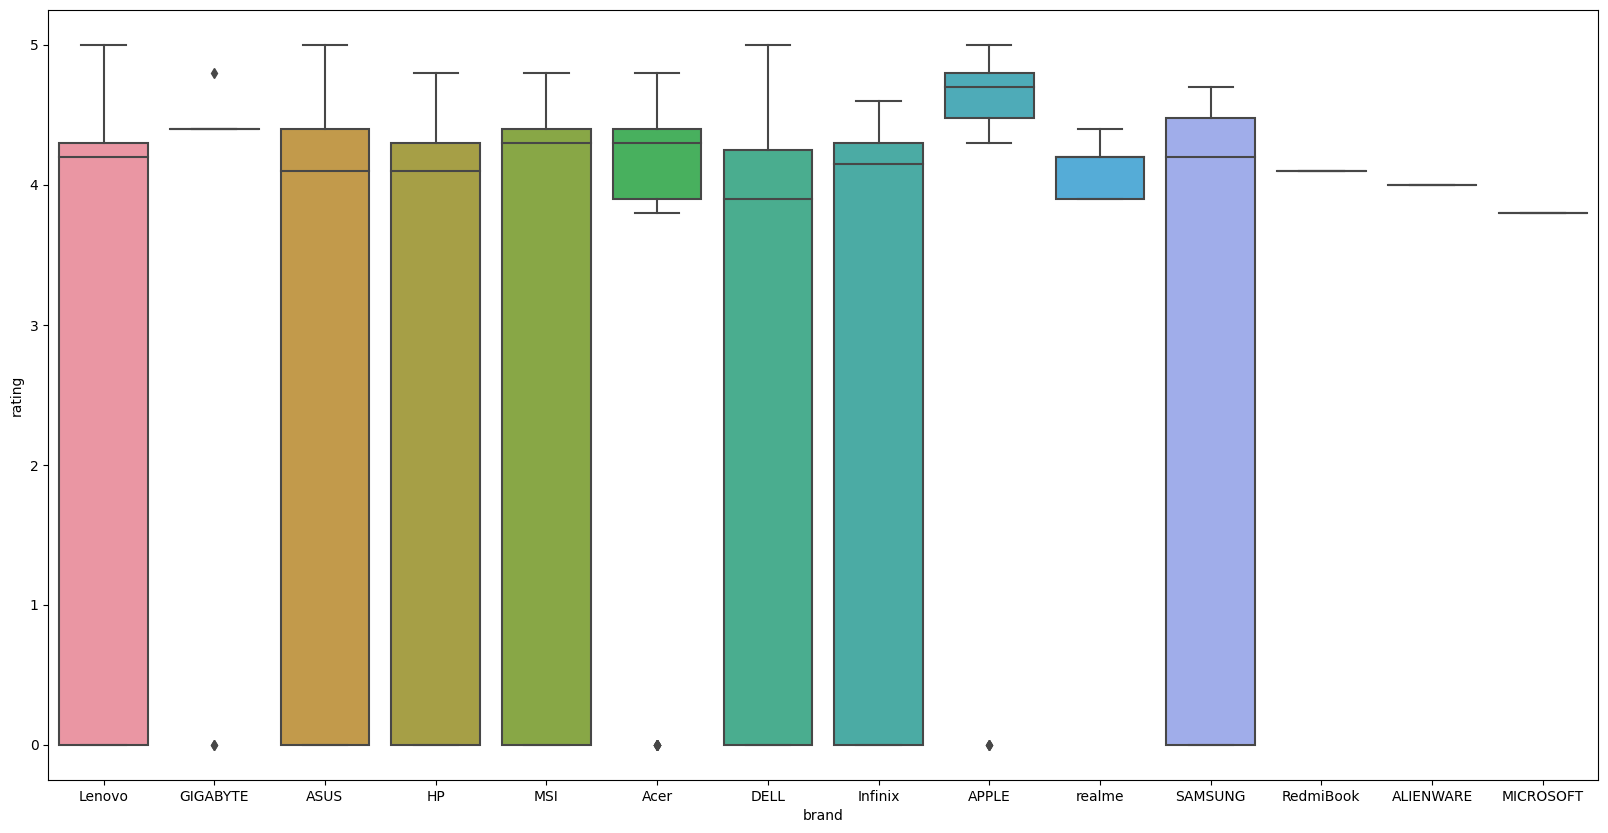

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(x = laptops.brand, y = laptops.rating)

<Axes: xlabel='brand', ylabel='price'>

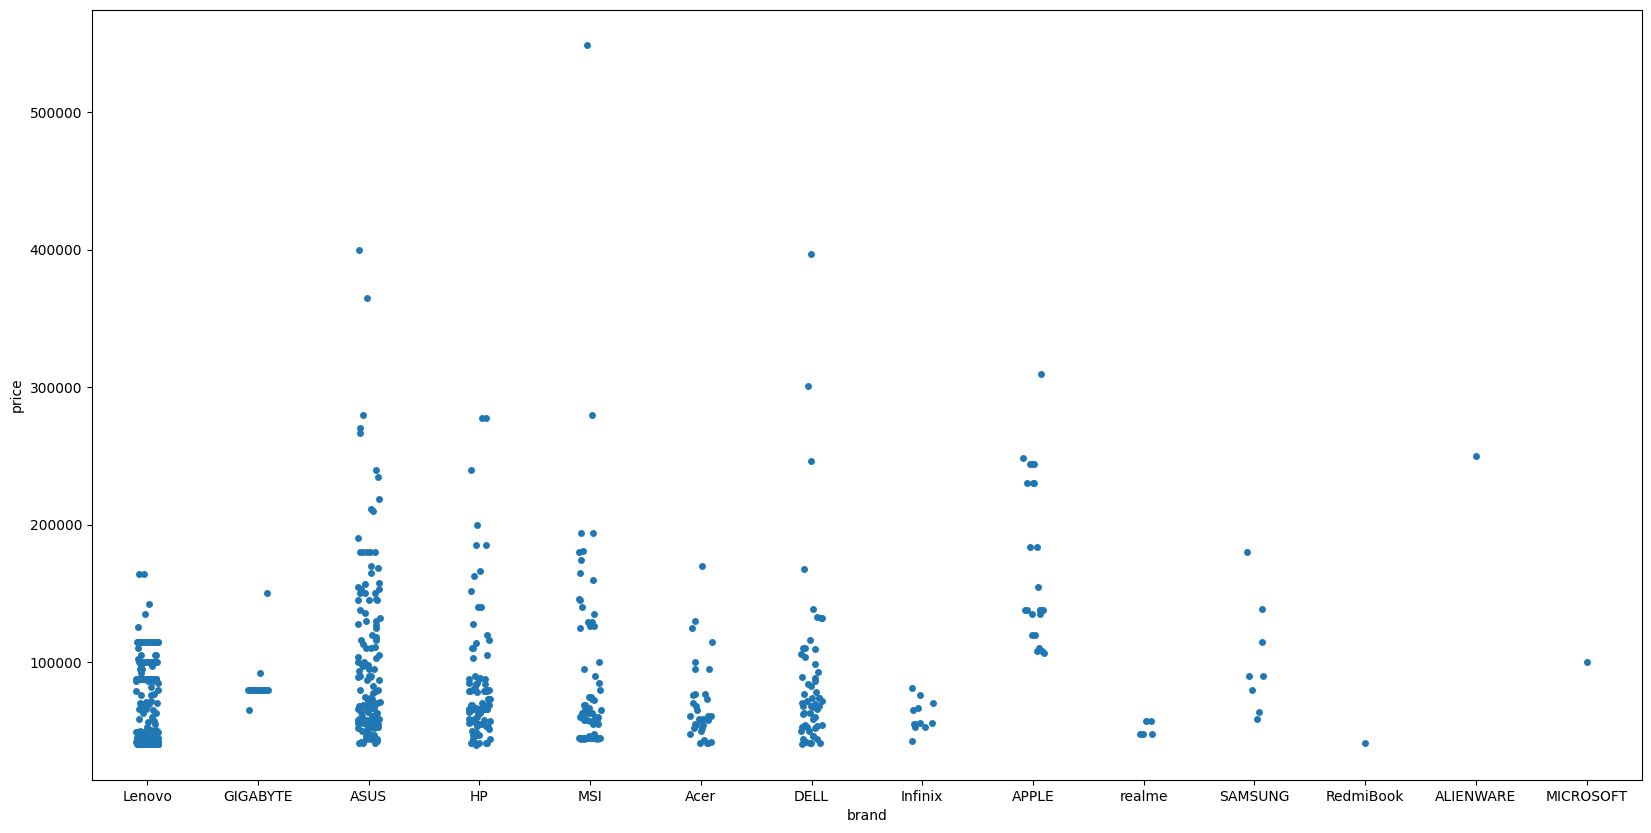

In [72]:
plt.figure(figsize=(20,10))
sns.stripplot(x = laptops.brand, y = laptops.price)

In [73]:
laptops.head()

,index,productname,price,specifications,rating,pagenumber,brand,RAM
0,0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,48990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,Lenovo,8 GB DDR4
1,1,GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 G...,79990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.4,1,GIGABYTE,16 GB DDR4
2,2,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
3,5,HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/W...,49990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,HP,8 GB DDR4
4,6,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,52990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.3,1,HP,16 GB DDR4


In [74]:
laptops['specifications'][5]

'Intel Core i5 Processor (11th Gen)16 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 Inch) Display1 Year Onsite Warranty + 1 Year ADP'